The data comes from a longitudinal study of lung tomography measurements of different groups of patients.

Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv

* For each group, is there a significant difference between time 1 and time 2?
* Is there a significant difference in the mean of all groups at time 2?


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [3]:
df['group'].unique()

array([1, 2, 3])

In [4]:
df.shape

(400, 4)

In [5]:
df.describe()

,group,t1,t2
count,400.000000,400.000000,400.000000
mean,1.750000,4235.997500,4229.355000
std,0.830195,1199.452175,1185.222621
min,1.000000,1178.000000,1241.000000
25%,1.000000,3448.250000,3396.750000
50%,1.500000,4180.000000,4244.500000
75%,2.250000,5061.500000,5078.500000
max,3.000000,7646.000000,7430.000000


In [6]:
df.isnull().sum()

group      0
patient    0
t1         0
t2         0
dtype: int64

In [8]:
group_1 = df[df['group'] == 1]
group_2 = df[df['group'] == 2]
group_3 = df[df['group'] == 3]

In [12]:
print('shapiro time 1, group 1:', stats.shapiro(group_1['t1']))
print('shapiro time 2, group 1:', stats.shapiro(group_1['t2']))

print('shapiro time 1, group 2:', stats.shapiro(group_2['t1']))
print('shapiro time 2, group 2:', stats.shapiro(group_2['t1']))

print('shapiro time 1, group 3:', stats.shapiro(group_3['t1']))
print('shapiro time 2, group 3:', stats.shapiro(group_3['t1']))

shapiro time 1, group 1: (0.9932351112365723, 0.4915737509727478)
shapiro time 2, group 1: (0.9955824613571167, 0.8313238024711609)
shapiro time 1, group 2: (0.994020402431488, 0.9413013458251953)
shapiro time 2, group 2: (0.994020402431488, 0.9413013458251953)
shapiro time 1, group 3: (0.9901381731033325, 0.675767183303833)
shapiro time 2, group 3: (0.9901381731033325, 0.675767183303833)


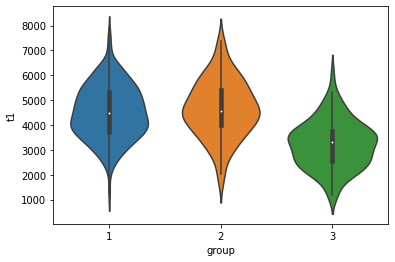

In [13]:
sns.violinplot(x=df['group'], y=df['t1'])

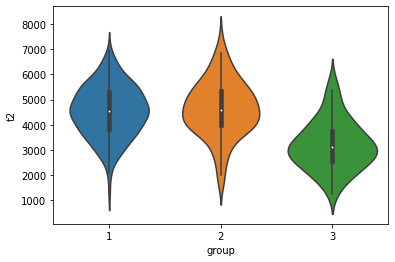

In [14]:
sns.violinplot(x=df['group'], y=df['t2'])

In [16]:
stats.f_oneway(group_1['t1'], group_2['t1'], group_3['t1'])

F_onewayResult(statistic=60.93469001386441, pvalue=8.33478034509647e-24)

In [17]:
stats.f_oneway(group_1['t2'], group_2['t2'], group_3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

In [18]:
stats.ttest_rel(group_1['t1'], group_1['t2'])

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)

In [19]:
stats.ttest_rel(group_2['t1'], group_2['t2'])

Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)

In [20]:
stats.ttest_rel(group_3['t1'], group_3['t2'])

Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['t2'],
                          groups = df['group'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


For each group, is there a significant difference between time 1 and time 2?

    According to the ANOVA test, we can say that there was no statistical significance in the difference between the means for each group for time 1 and time 2.

Is there a significant difference in the mean of all groups at time 2?

    According to the violin plot and the Tukey test, there is a significant difference between group 3 and the other groups. However, there is no significant difference between group 1 and group 2.